# Simulación en R aplicada a\\ la Ley de los Grandes Números y\\ Teorema Central del Límite

|       Nombre      | Libreta |
|:-----------------:|:-------:|
| Florencia Zanollo |  934/11 |
| Christian Murga   |  982/12 |

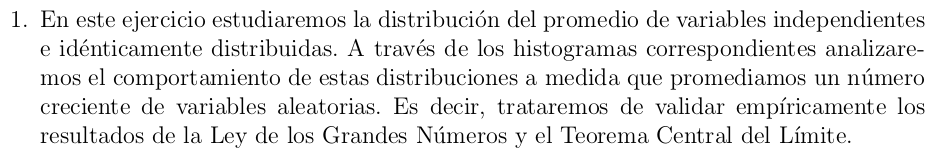

In [20]:
#semilla
set.seed(1234)

#librerias utilizadas
library(ggplot2)

#funciones auxiliares
make_histogram = function(datos, title){
    bw = 2 * IQR(datos) / length(datos)^(1/3)
    df = data.frame(x = datos)
    
    ggplot(df, aes(x)) + 
        geom_histogram(binwidth=bw, color="black", fill="white") + 
        ggtitle(title)
}

## a) 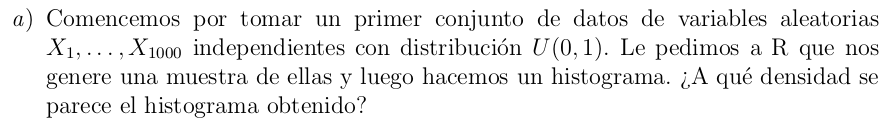

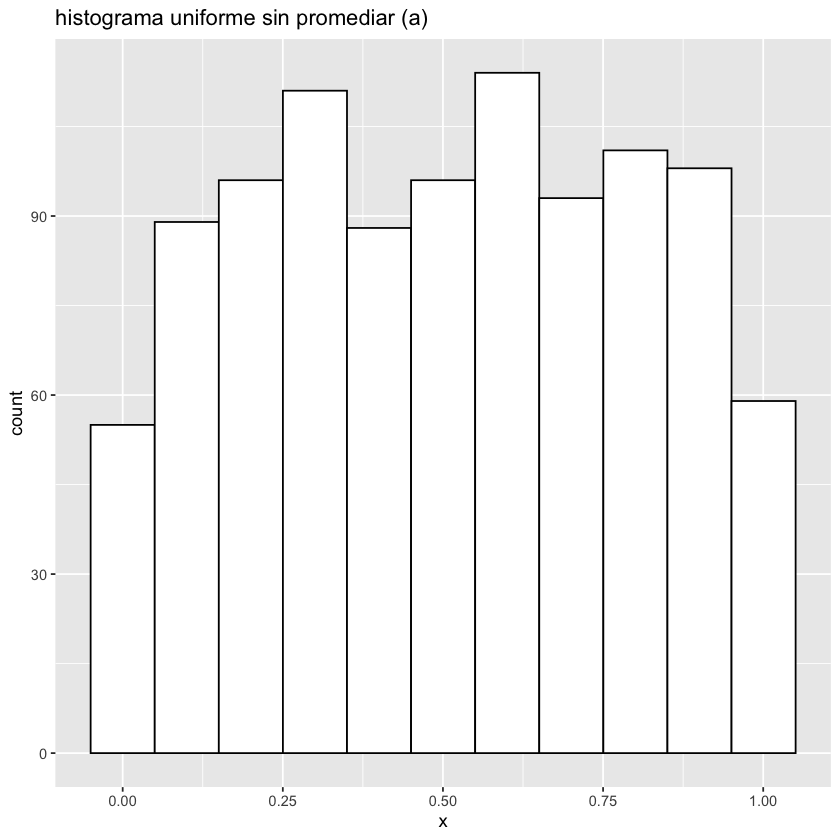

In [21]:
a_datos = runif(1000)
make_histogram(a_datos, "histograma uniforme sin promediar (a)")

Tiene pinta de... Uniforme medio mordida?

## b) 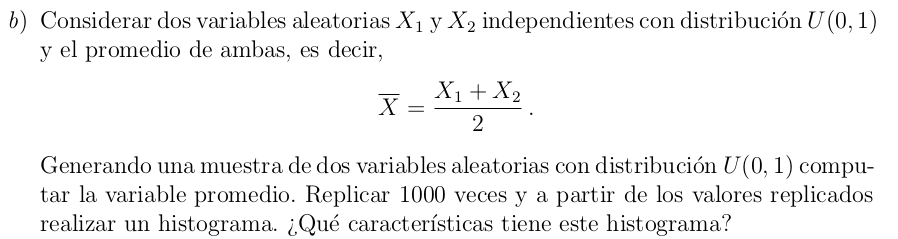

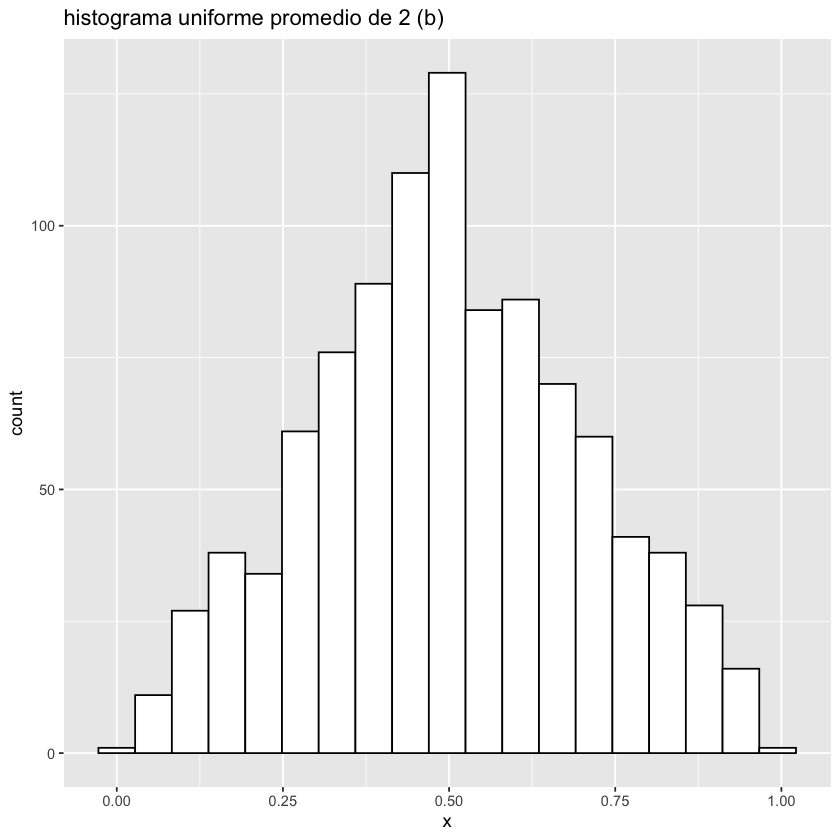

In [22]:
b_datos = replicate(1000, {mean(runif(2))})
make_histogram(b_datos, "histograma uniforme promedio de 2 (b)")

## c) 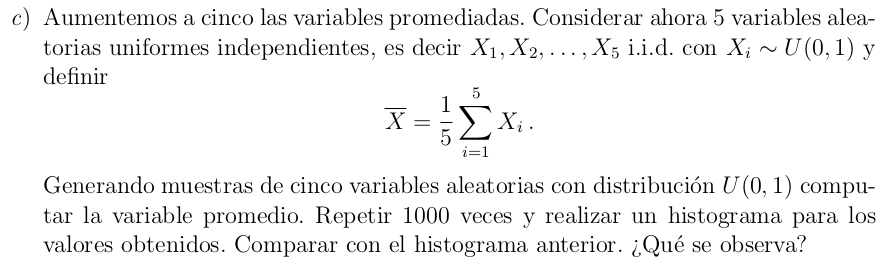

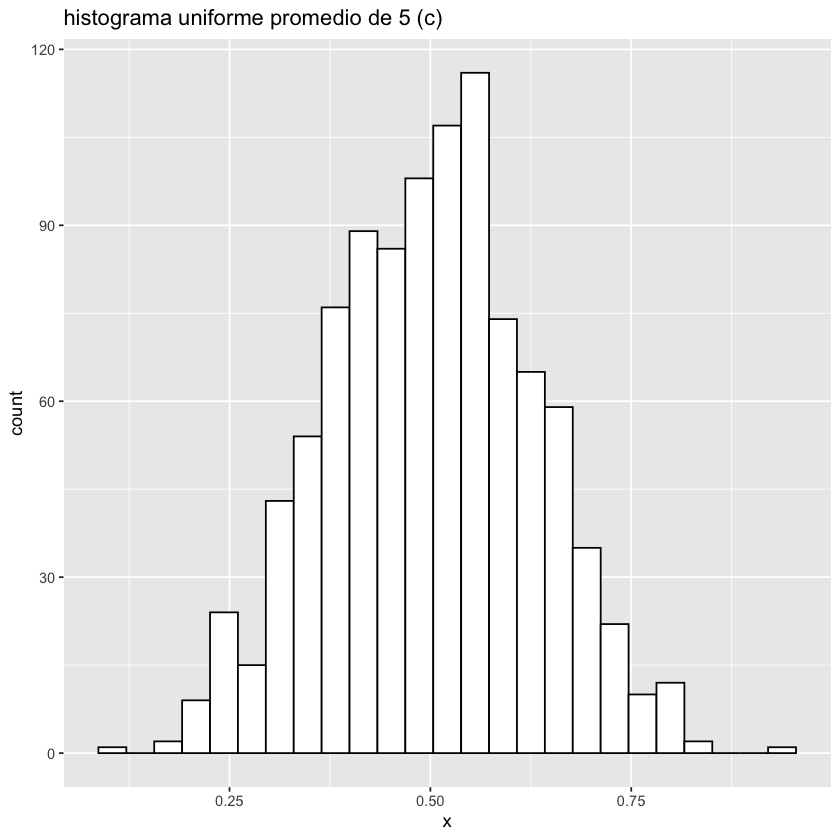

In [23]:
c_datos = replicate(1000, {mean(runif(5))})
make_histogram(c_datos, "histograma uniforme promedio de 5 (c)")

## d) 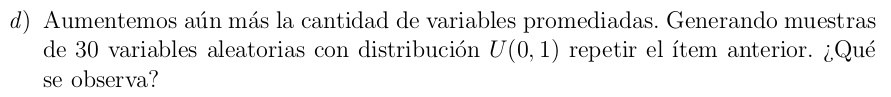

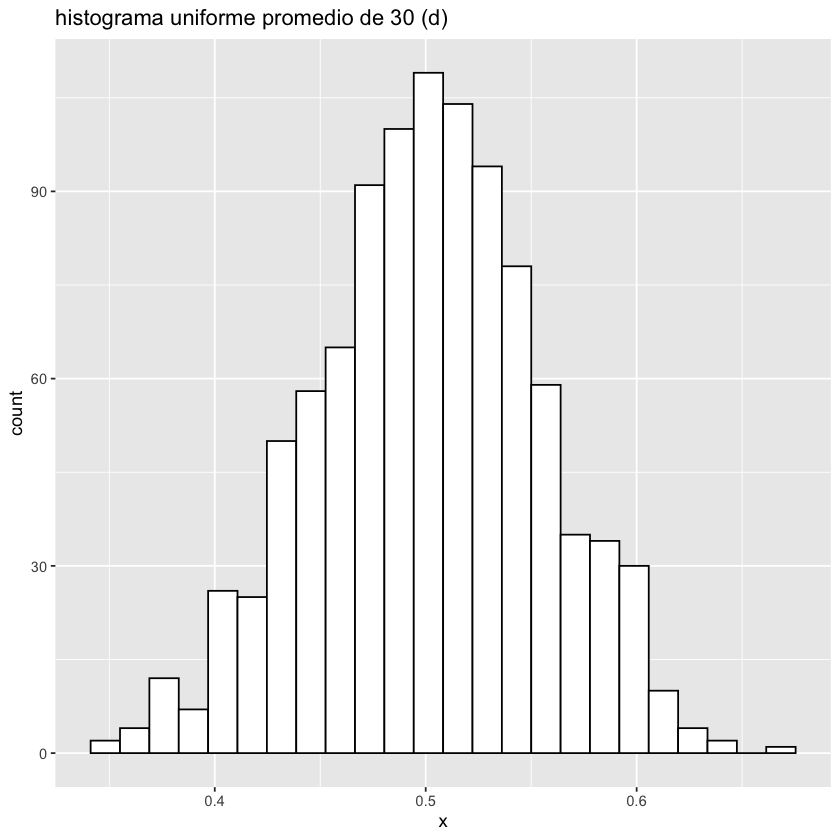

In [24]:
d_datos = replicate(1000, {mean(runif(30))})
make_histogram(d_datos, "histograma uniforme promedio de 30 (d)")

Que se observa?

## e) 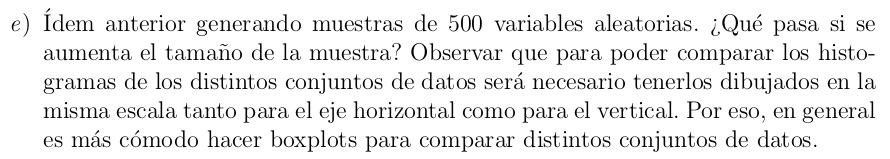

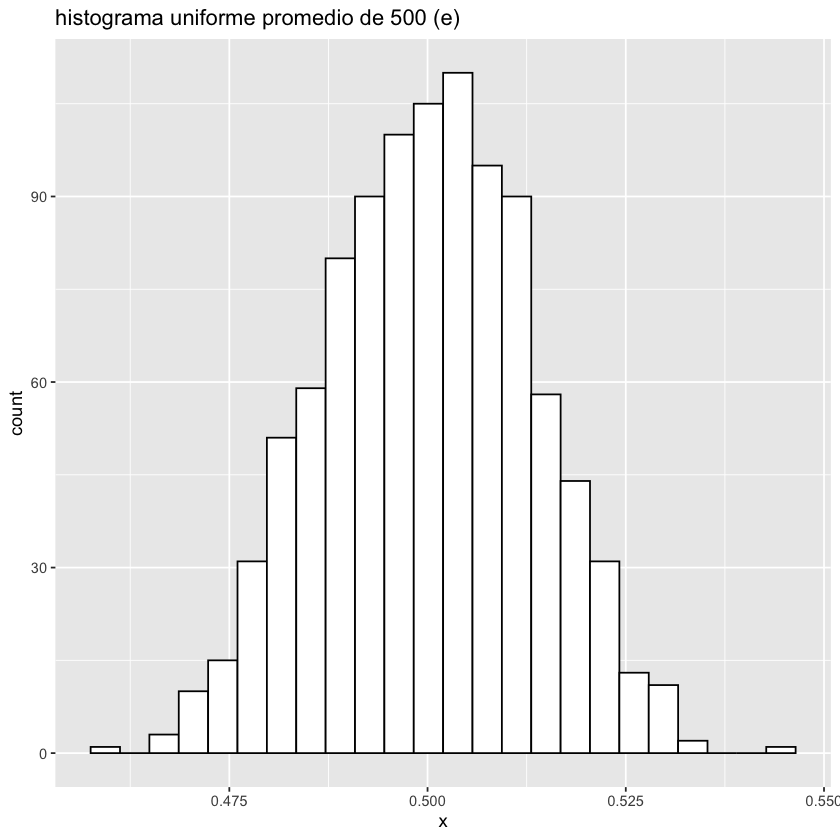

In [25]:
e_datos = replicate(1000, {mean(runif(500))})
make_histogram(e_datos, "histograma uniforme promedio de 500 (e)")

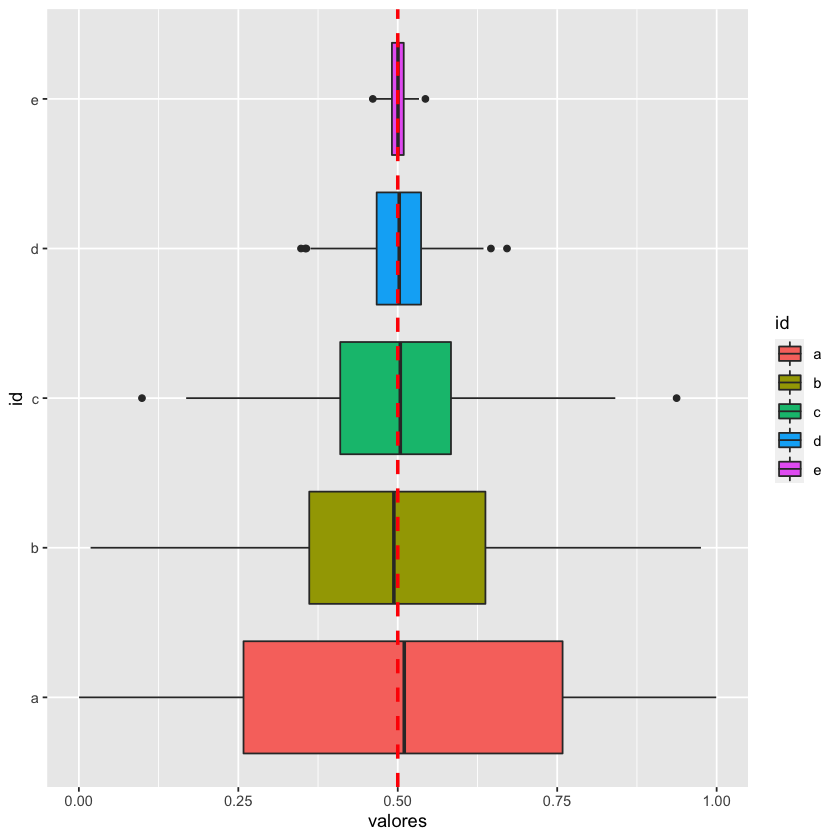

In [26]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos), id=rep(c('a','b','c','d','e'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip() + geom_hline(yintercept = 0.5, linetype="dashed", color = "red", size=1)

## f) 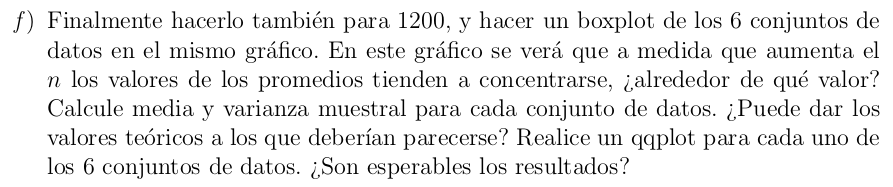

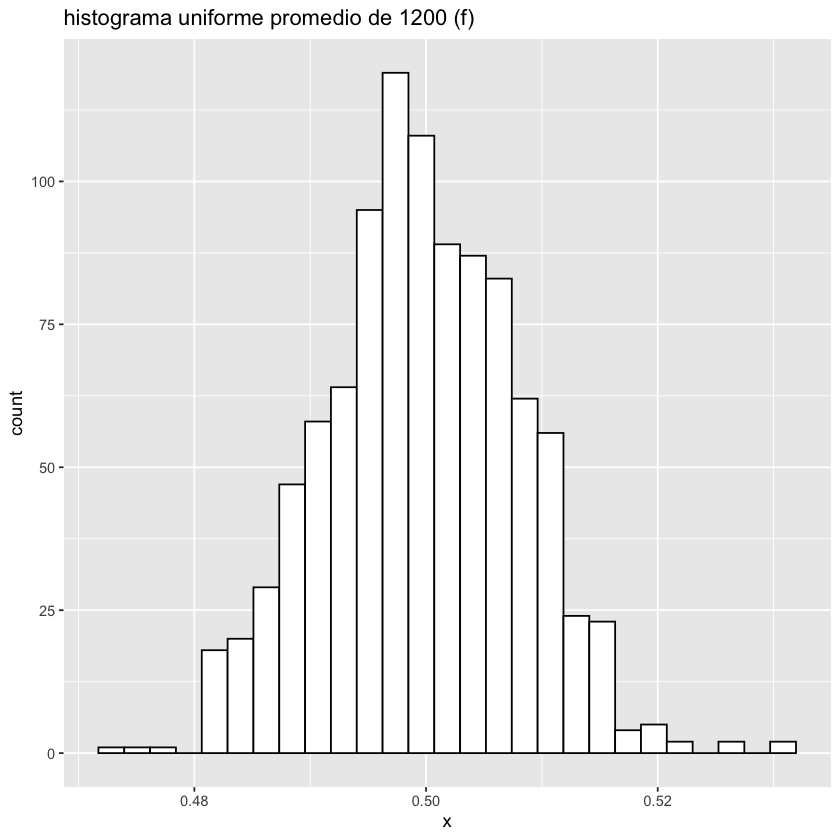

In [27]:
f_datos = replicate(1000, {mean(runif(1200))})
make_histogram(f_datos, "histograma uniforme promedio de 1200 (f)")

Podemos ver que a medida que aumenta n los valores se acumulan mas alrededor de la media.
Calcular los valores teoricos usando Ley de los grandes números. 

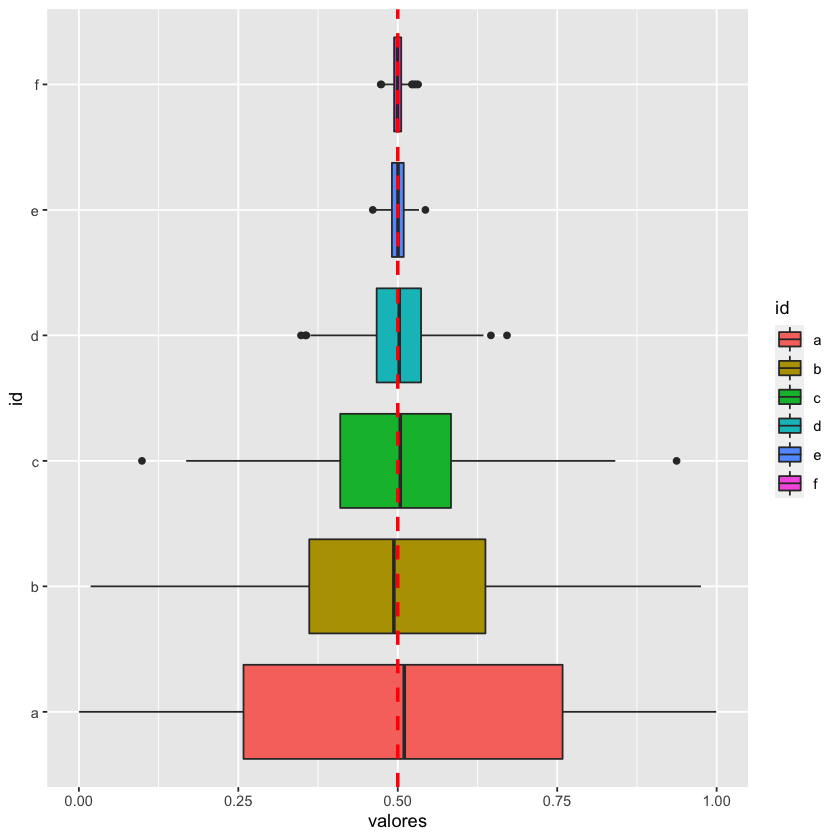

In [28]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos, f_datos), id=rep(c('a','b','c','d','e','f'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip() + geom_hline(yintercept = 0.5, linetype="dashed", color = "red", size=1)

Se concentran alrededor de 0.5.
Si observamos los boxplots podemos apreciar que a medida que aumentamos n (la cantidad de variables aleatorias) el boxplot es menos disperso acumulandose en la media. (Esto lo podemos comprobar? usando la Ley de los grandes numeros)

In [29]:
for (ej in unique(dat$id)){
    obs = dat[dat$id==ej,]$valores
    cat('Ejercicio ', ej, '\n')
    cat('\tmedia muestral: ', mean(obs), '\n')
    cat('\tvarianza muestral: ', var(obs), '\n')
}

Ejercicio  a 
	media muestral:  0.5072735 
	varianza muestral:  0.08480223 
Ejercicio  b 
	media muestral:  0.4990225 
	varianza muestral:  0.04016331 
Ejercicio  c 
	media muestral:  0.500426 
	varianza muestral:  0.01623092 
Ejercicio  d 
	media muestral:  0.5009557 
	varianza muestral:  0.002792075 
Ejercicio  e 
	media muestral:  0.5000568 
	varianza muestral:  0.000167577 
Ejercicio  f 
	media muestral:  0.4996786 
	varianza muestral:  6.876292e-05 


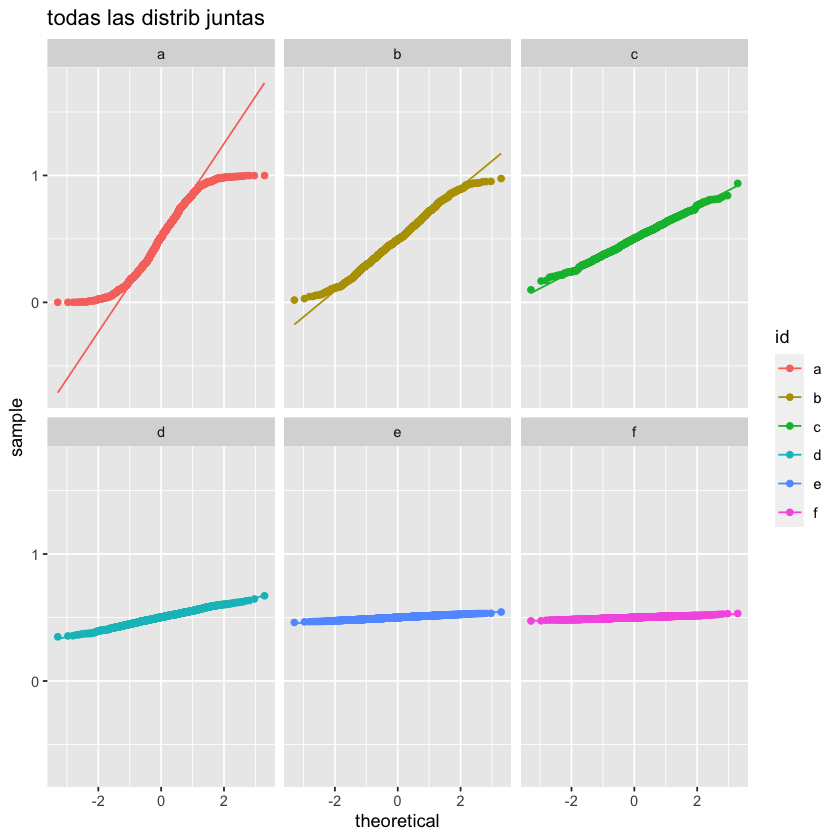

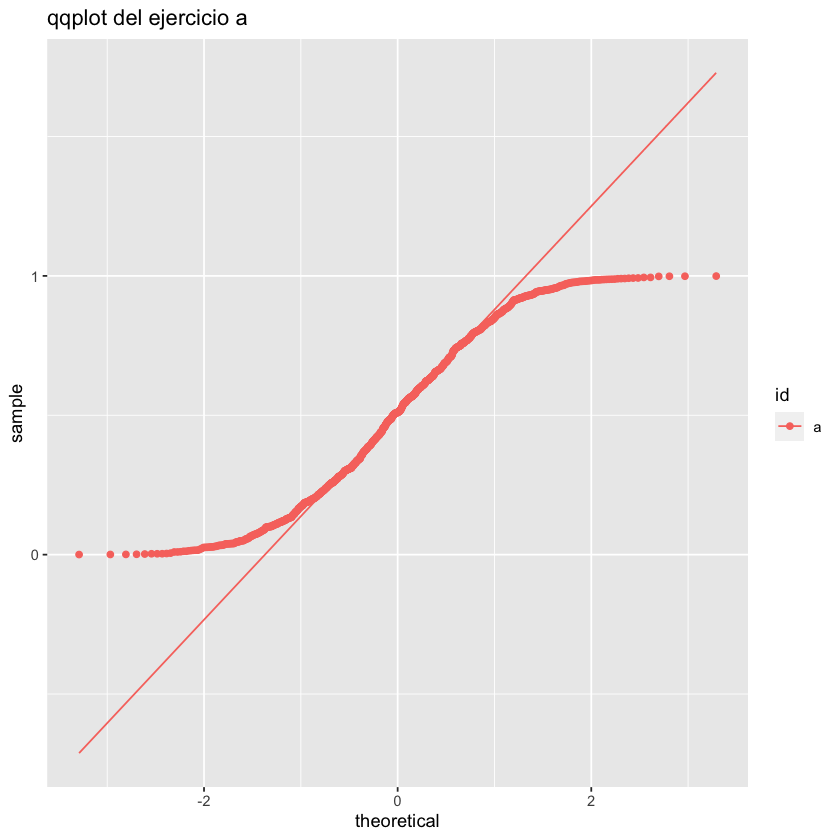

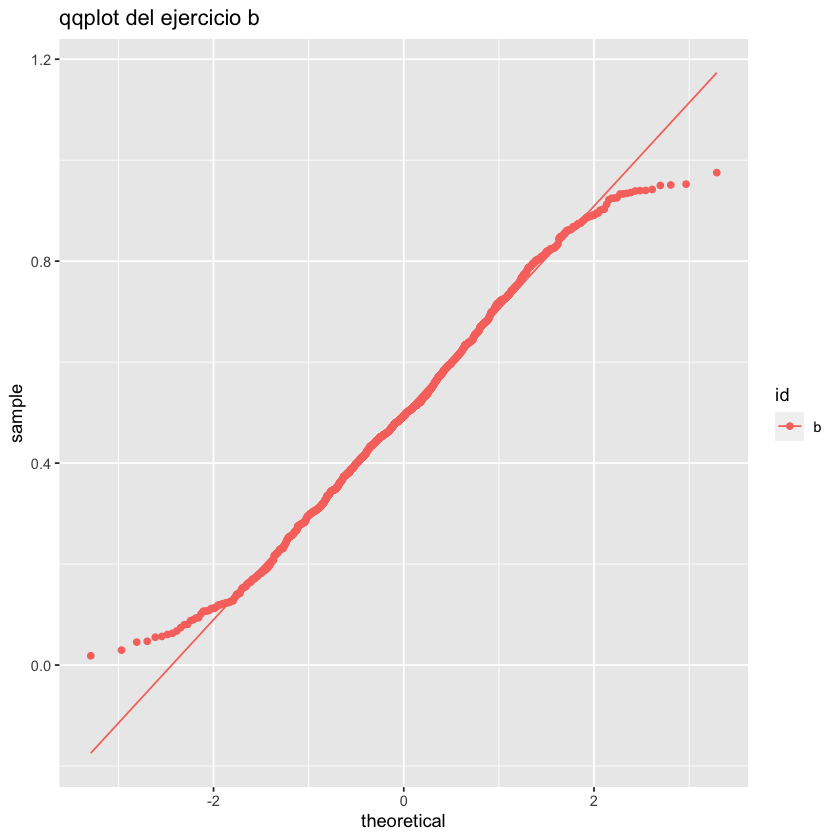

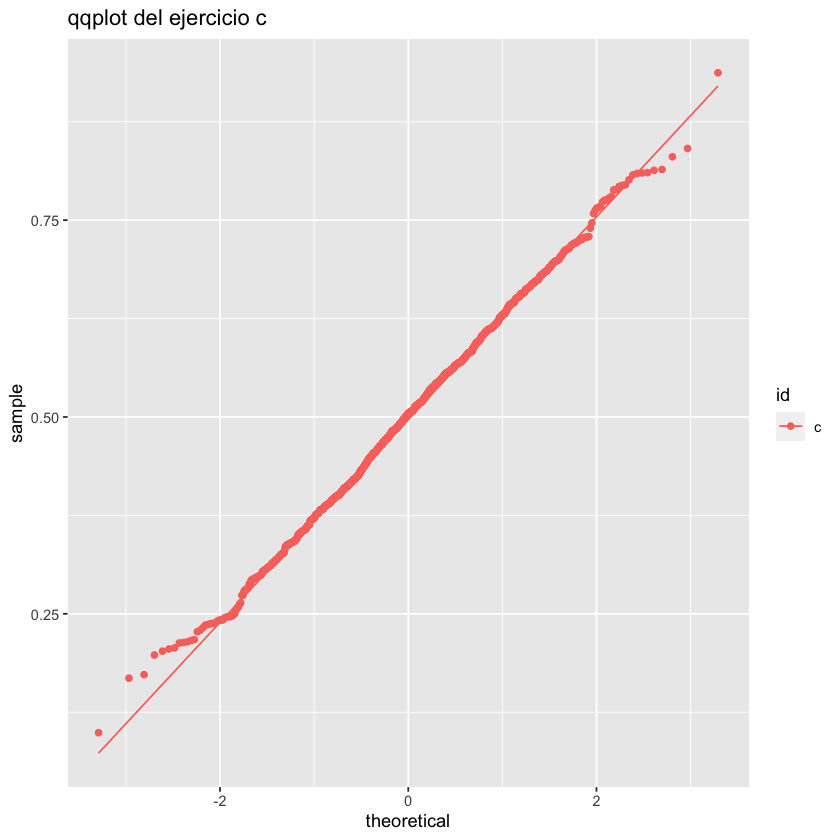

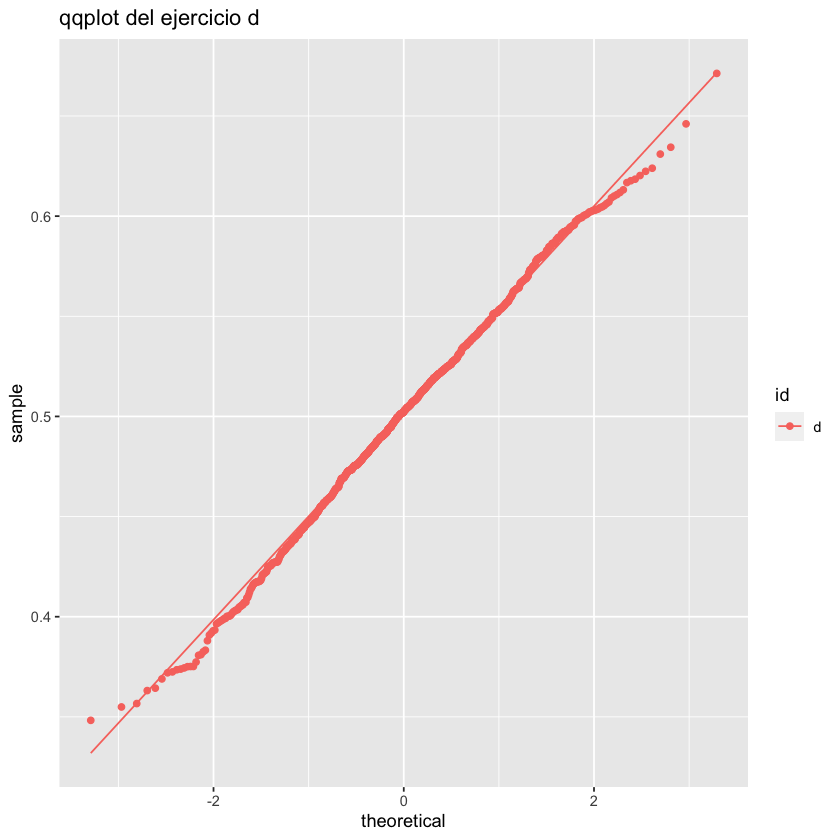

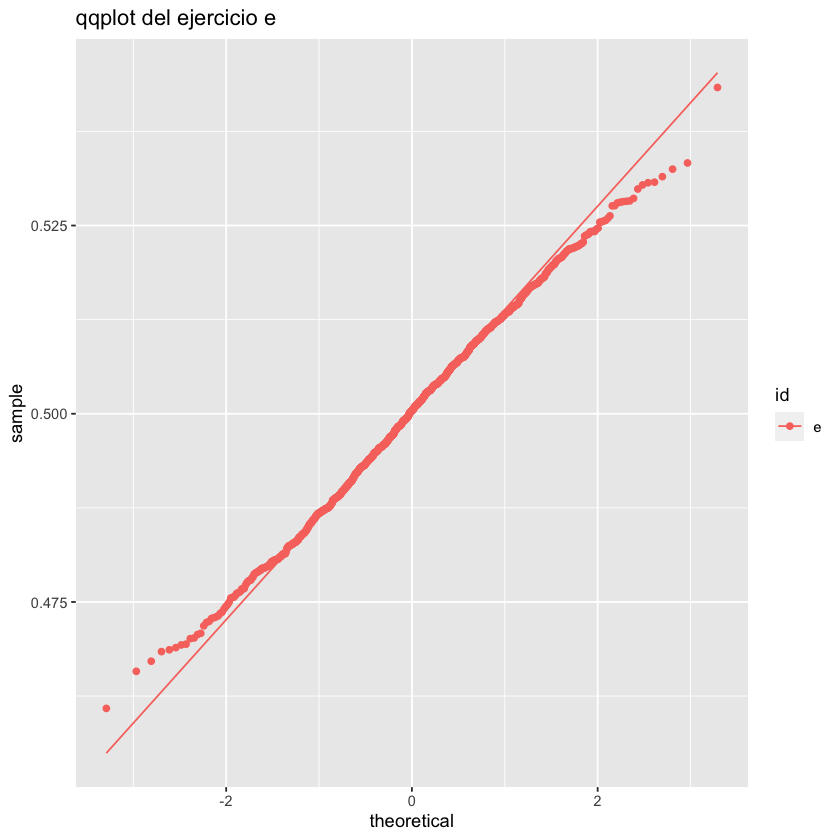

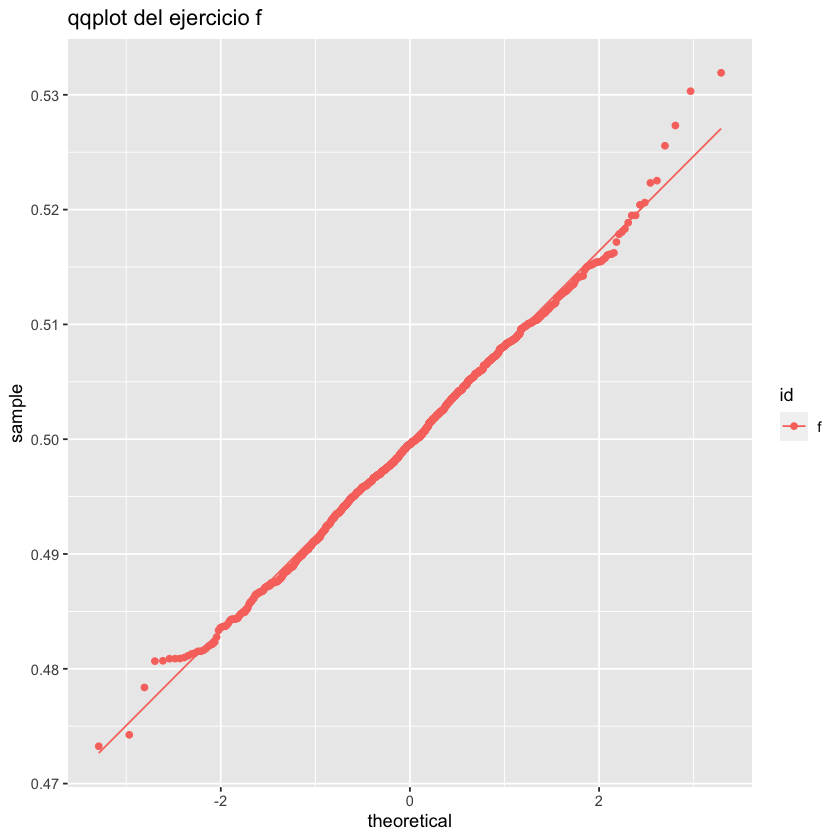

In [30]:
p <- ggplot(dat, aes(sample=valores, color=id))
p + stat_qq() + stat_qq_line()  + facet_wrap(~ id) + ggtitle("todas las distrib juntas")

for (ej in unique(dat$id)) {
    print(ggplot(dat[dat$id==ej,], aes(sample=valores, color=id)) + 
          stat_qq() + stat_qq_line() +
          ggtitle(sprintf("qqplot del ejercicio %s", ej)))
}

TODO:
 - ¿Puede dar los valores teóricos a los que deberı́an parecerse?
 - sacar los teoricos y compararlos de alguna manera (o se supone que con el qqplot esta?)
 - ¿Son esperables los resultados? (de los qqplot)
 
 qqplot:
 Los gráficos qqplot se usan para comparar distribuciones, en nuestro caso podemos ver que a medida que aumentamos n nuestra distribución se parece cada vez más a la recta x=y (0,1) llegando a estar casi superpuestas indicando que se parece mucho a la distribucion N(0,1).

## g) 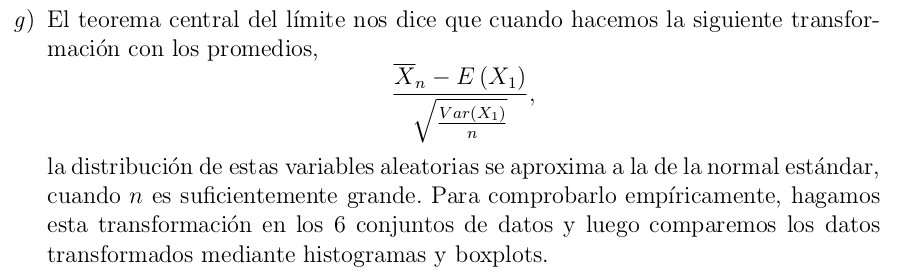

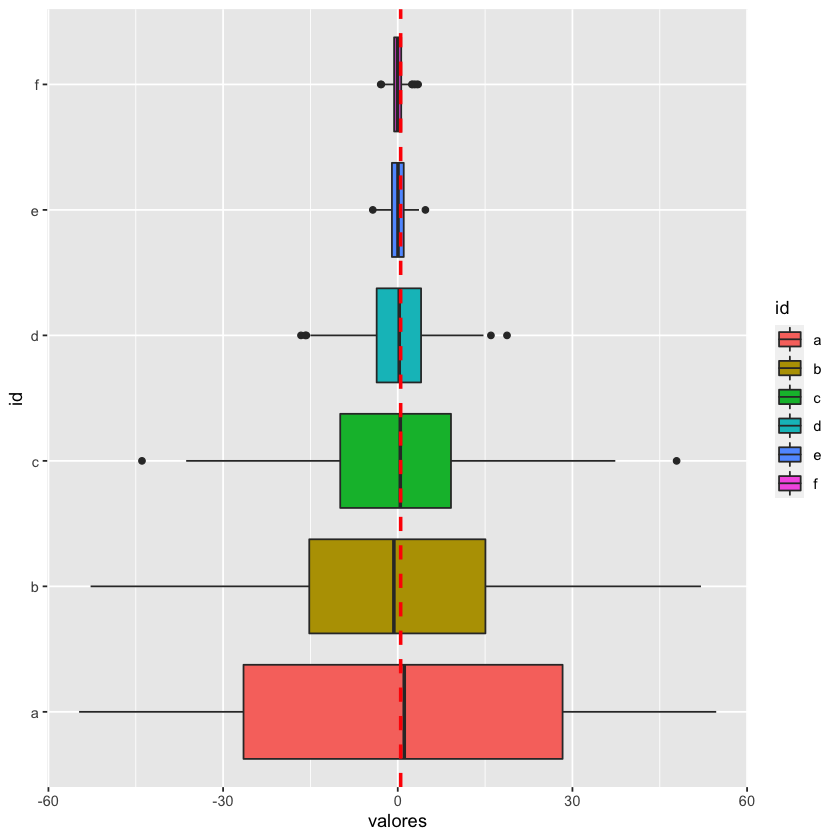

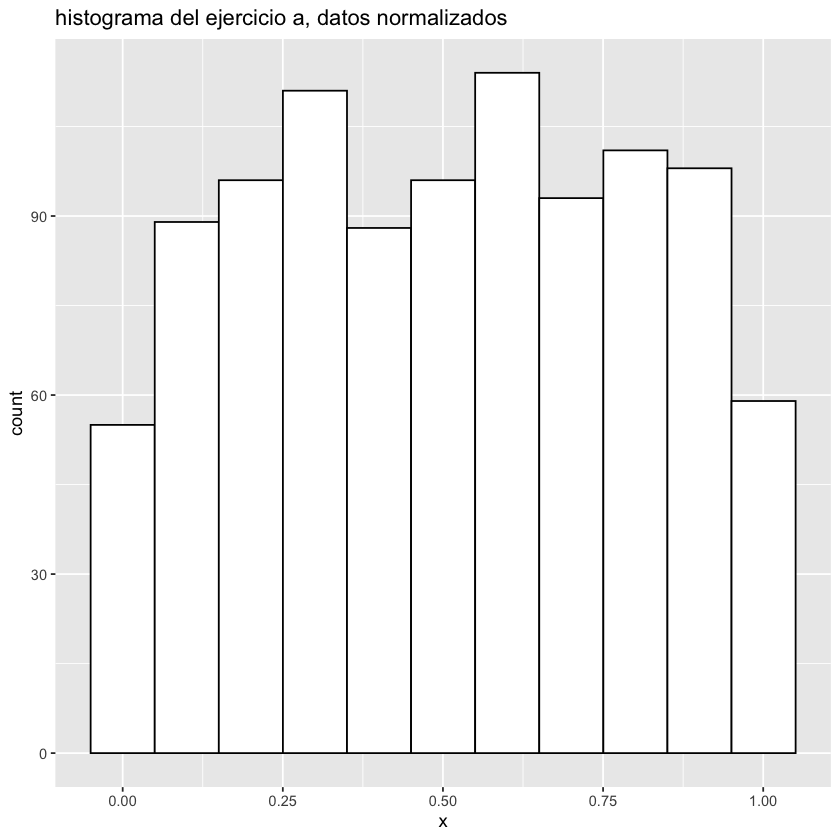

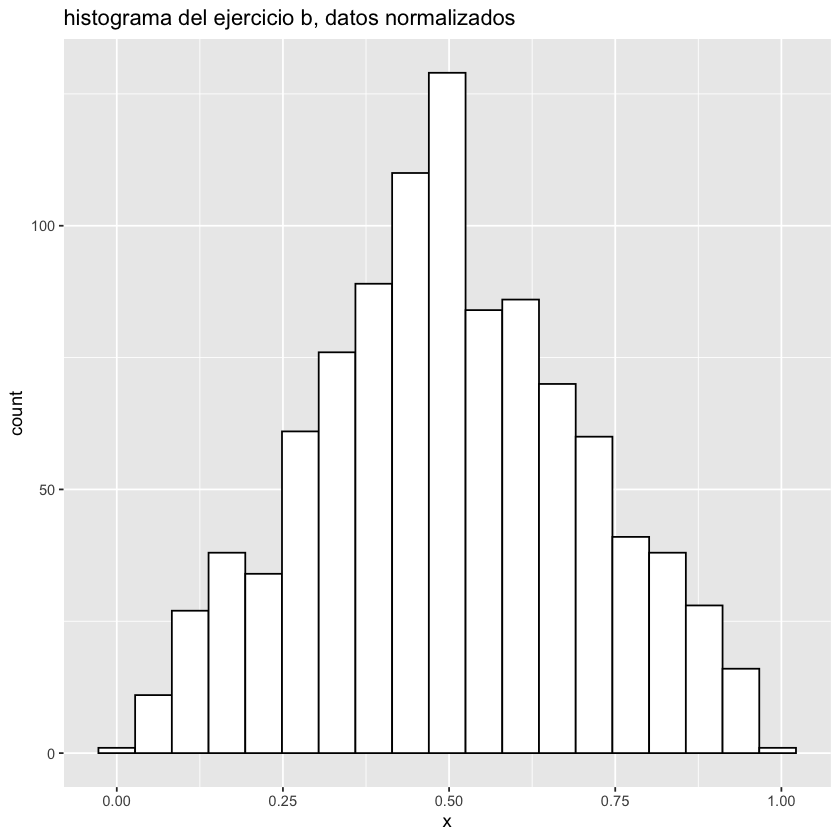

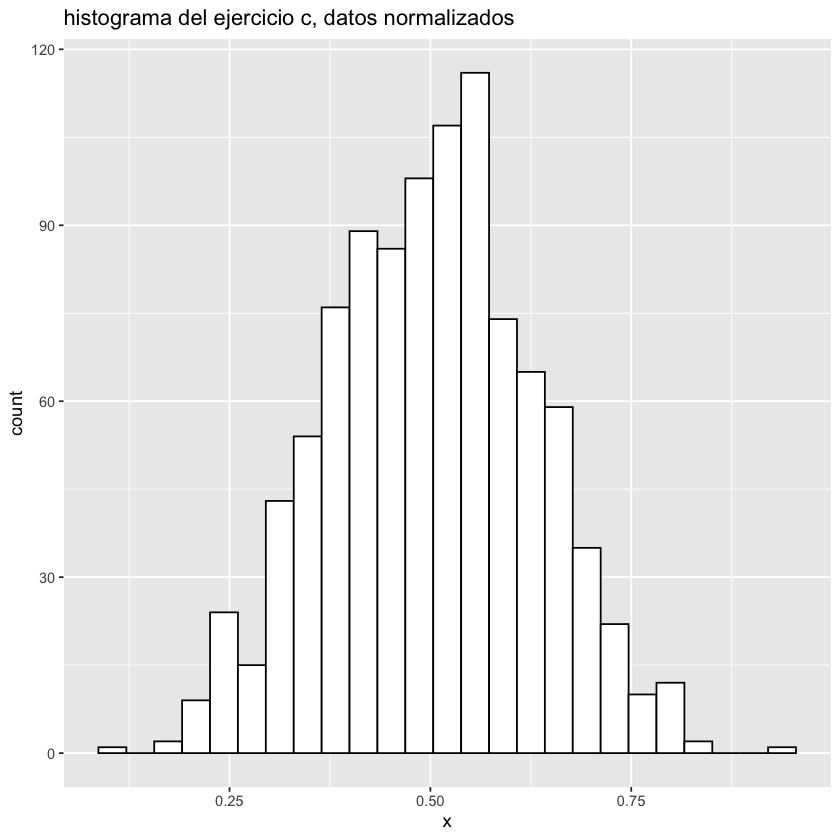

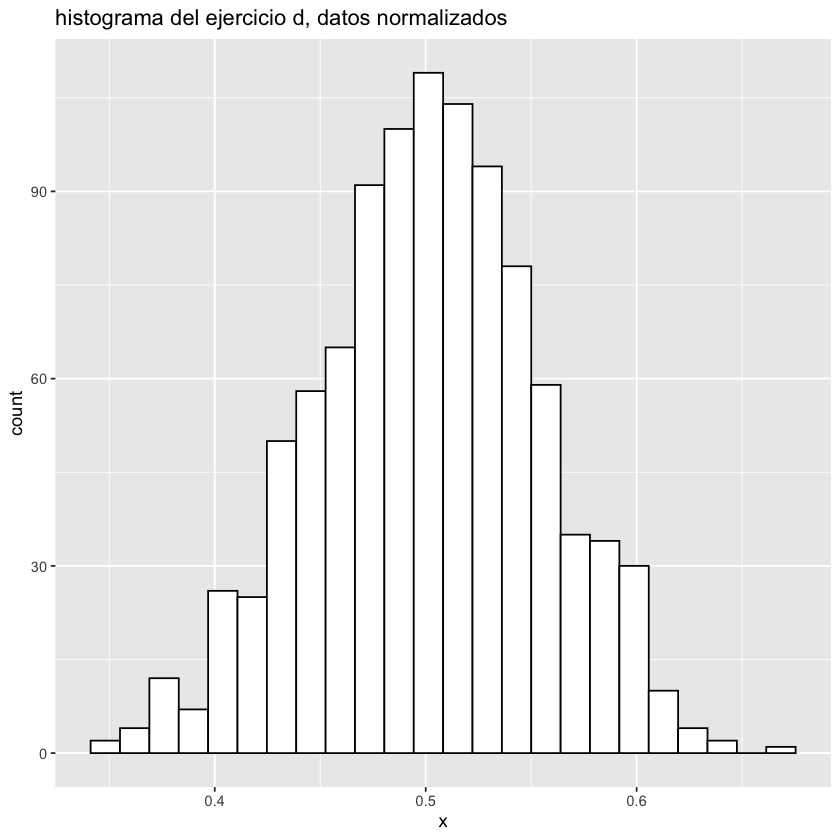

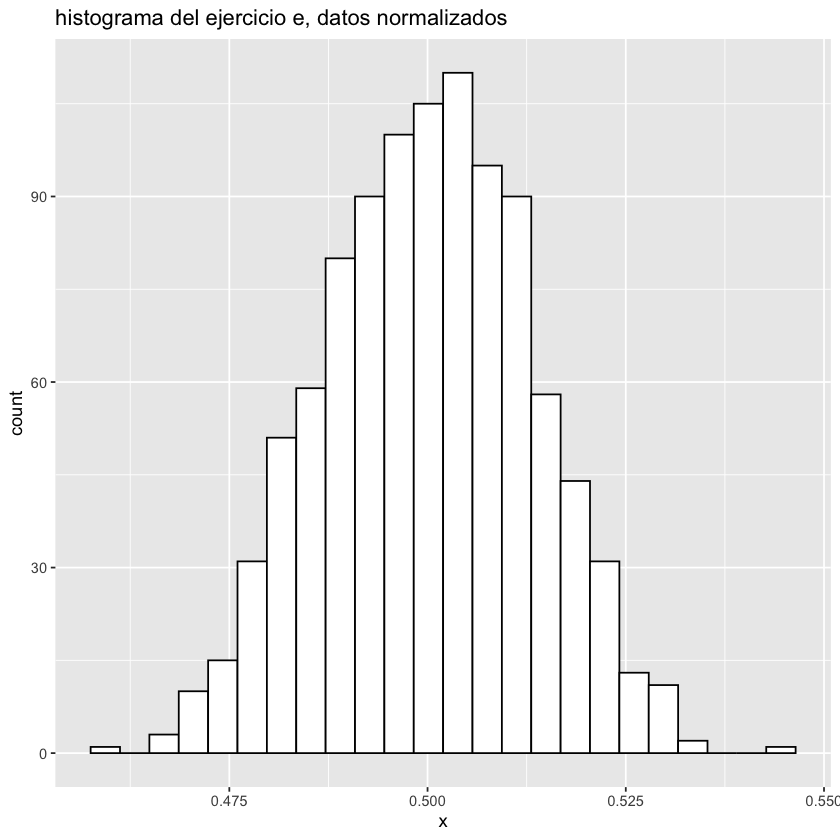

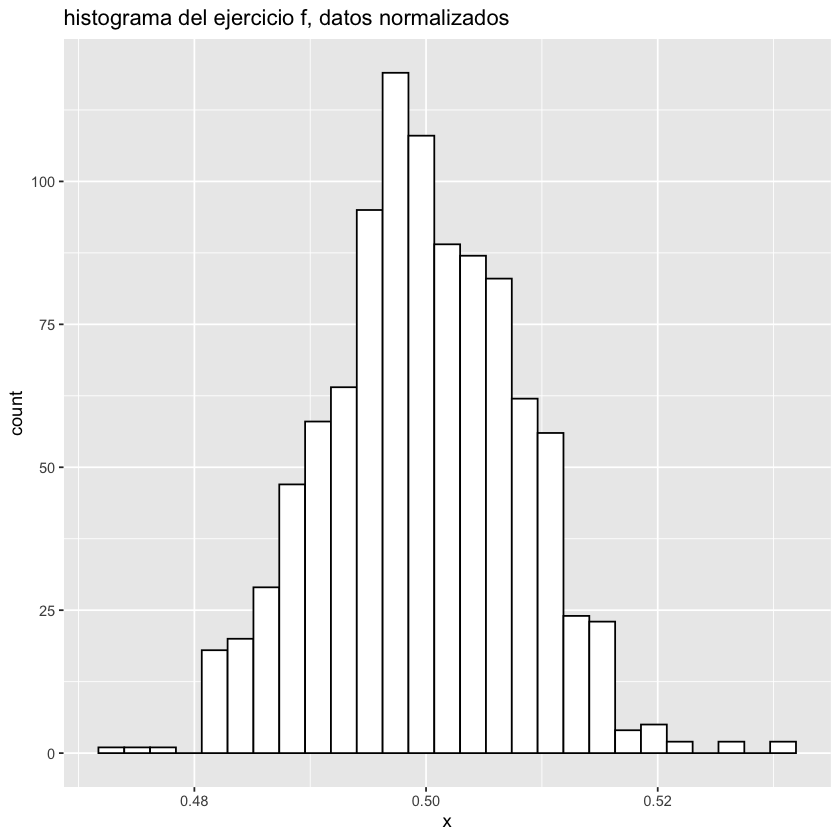

In [31]:
normalizar = function(obs){
    (obs - 0.5) / sqrt((1/12)/1000) # las esperanzas y varianzas son las mismas para todos no?
}

dat_normalizados = dat
dat_normalizados[1] = lapply(dat_normalizados[1], normalizar)

ggplot(dat_normalizados, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip() + geom_hline(yintercept = 0.5, linetype="dashed", color = "red", size=1)

for (ej in unique(dat$id)) {
    datos = dat[dat$id==ej,]$valores
    title = sprintf("histograma del ejercicio %s, datos normalizados", ej)
    print(make_histogram(datos, title))
}

## h) 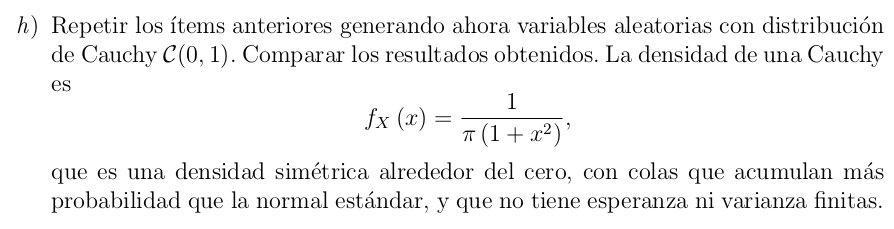

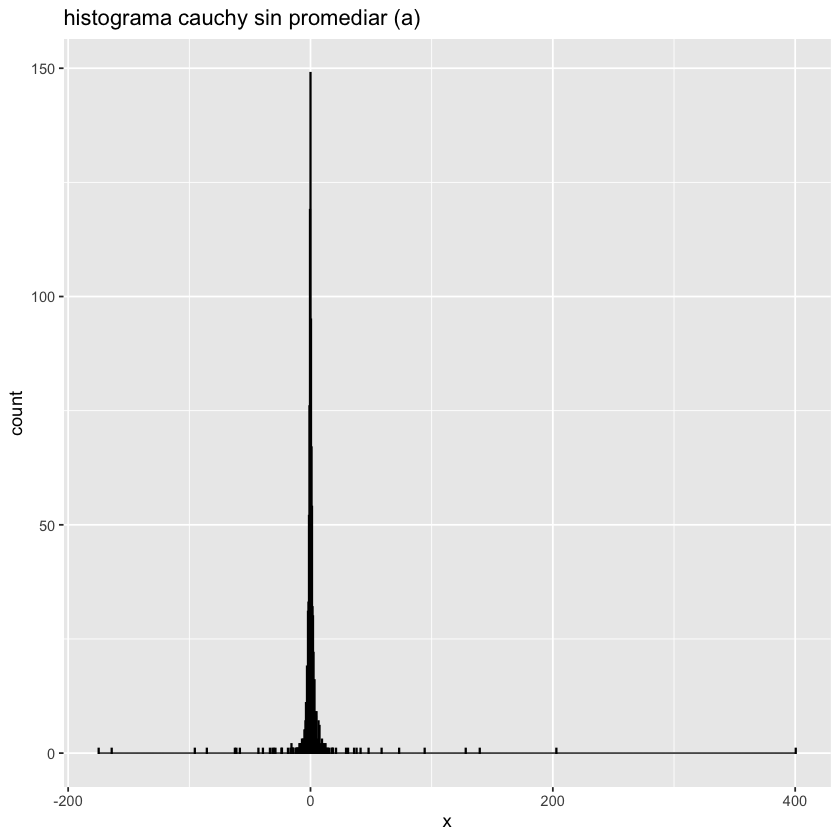

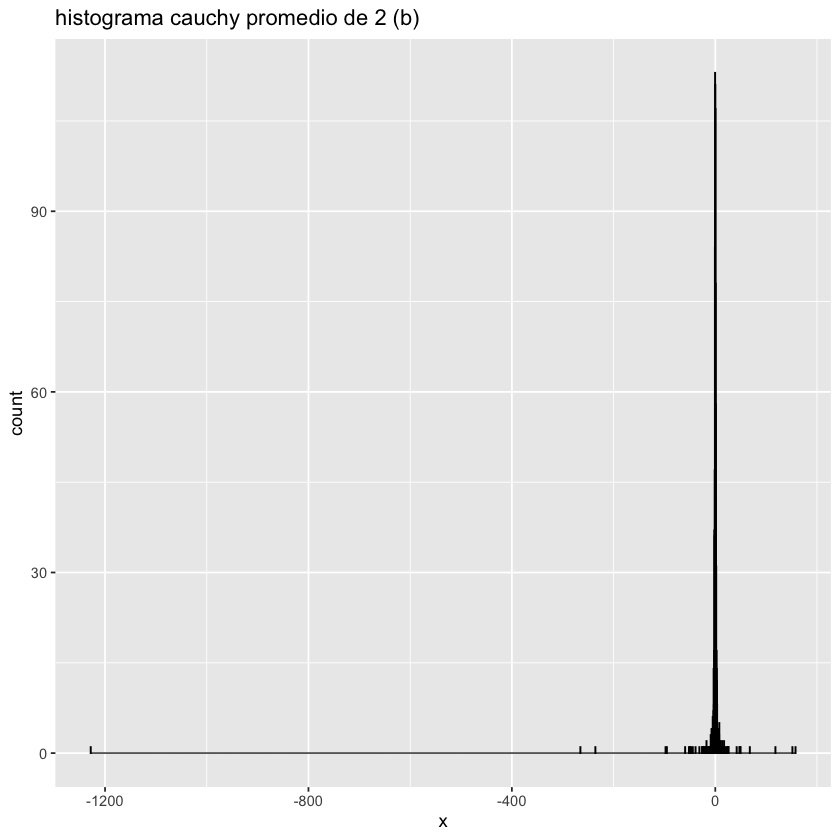

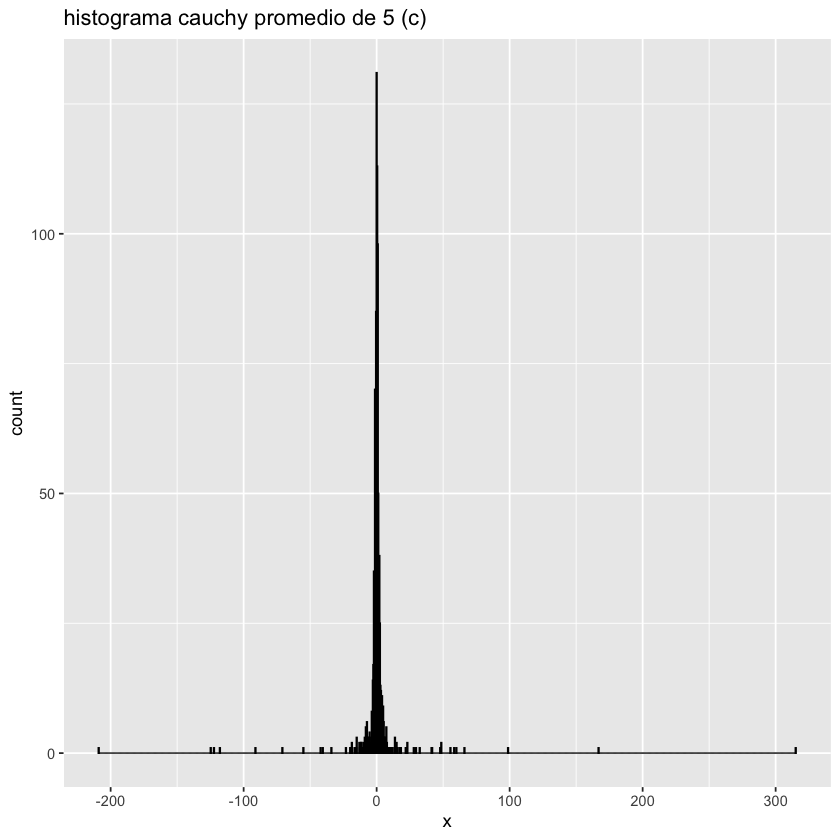

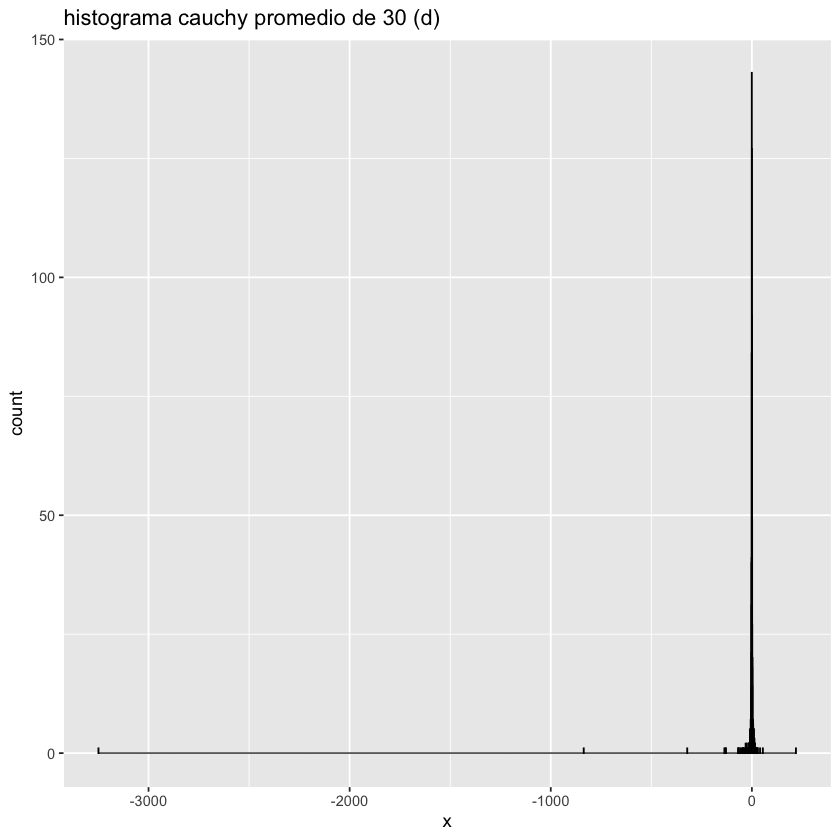

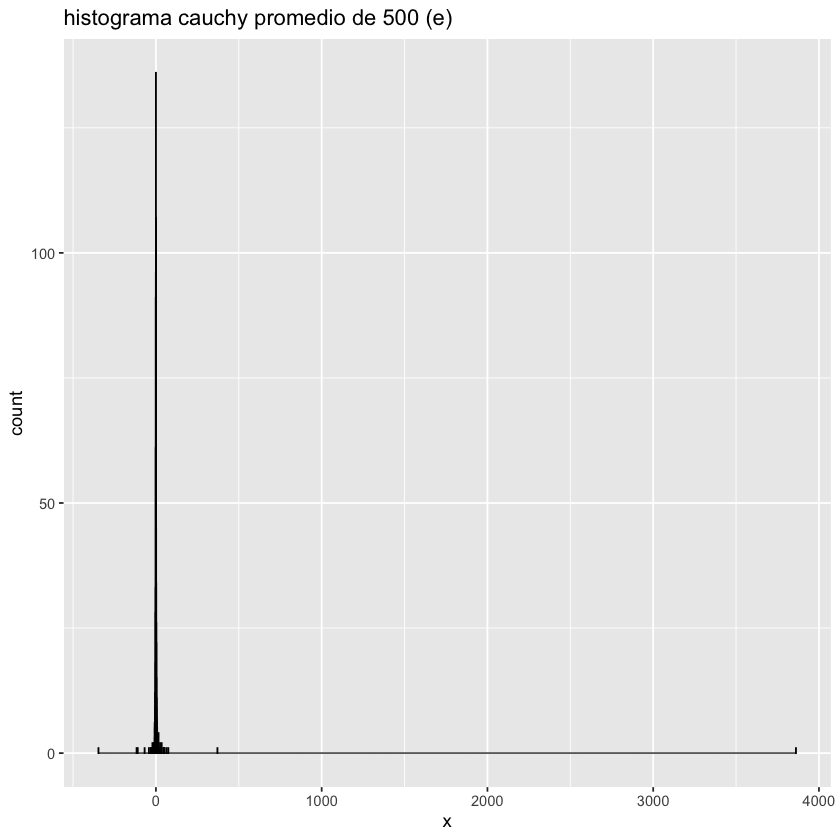

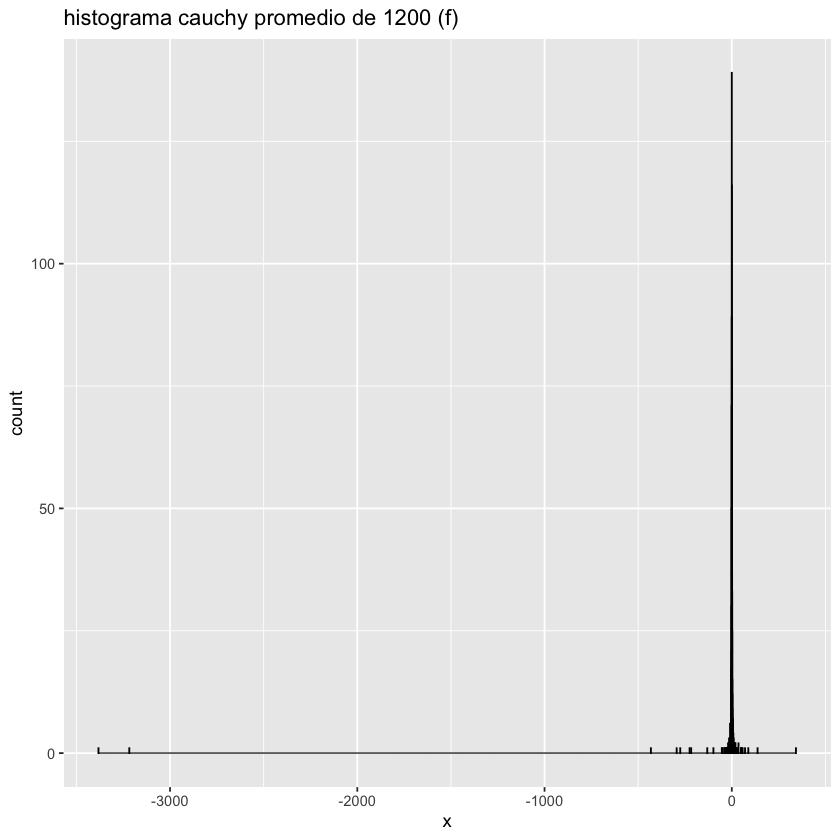

In [47]:
#a = 1000 datos sin promediar
a_datos_h = rcauchy(1000, location = 0, scale = 1)
make_histogram(a_datos_h, "histograma cauchy sin promediar (a)")

#b = 1000 datos promedio de 2
b_datos_h = replicate(1000, {mean(rcauchy(2, location = 0, scale = 1))})
make_histogram(b_datos_h, "histograma cauchy promedio de 2 (b)")

#c = 1000 datos promedio de 5
c_datos_h = replicate(1000, {mean(rcauchy(5, location = 0, scale = 1))})
make_histogram(c_datos_h, "histograma cauchy promedio de 5 (c)")

#d = 1000 datos promedio de 30
d_datos_h = replicate(1000, {mean(rcauchy(30))})
make_histogram(d_datos_h, "histograma cauchy promedio de 30 (d)")

#e = 1000 datos promedio de 500
e_datos_h = replicate(1000, {mean(rcauchy(500))})
make_histogram(e_datos_h, "histograma cauchy promedio de 500 (e)")

#f = 1000 datos promedio de 1200
f_datos_h = replicate(1000, {mean(rcauchy(1200))})
make_histogram(f_datos_h, "histograma cauchy promedio de 1200 (f)")

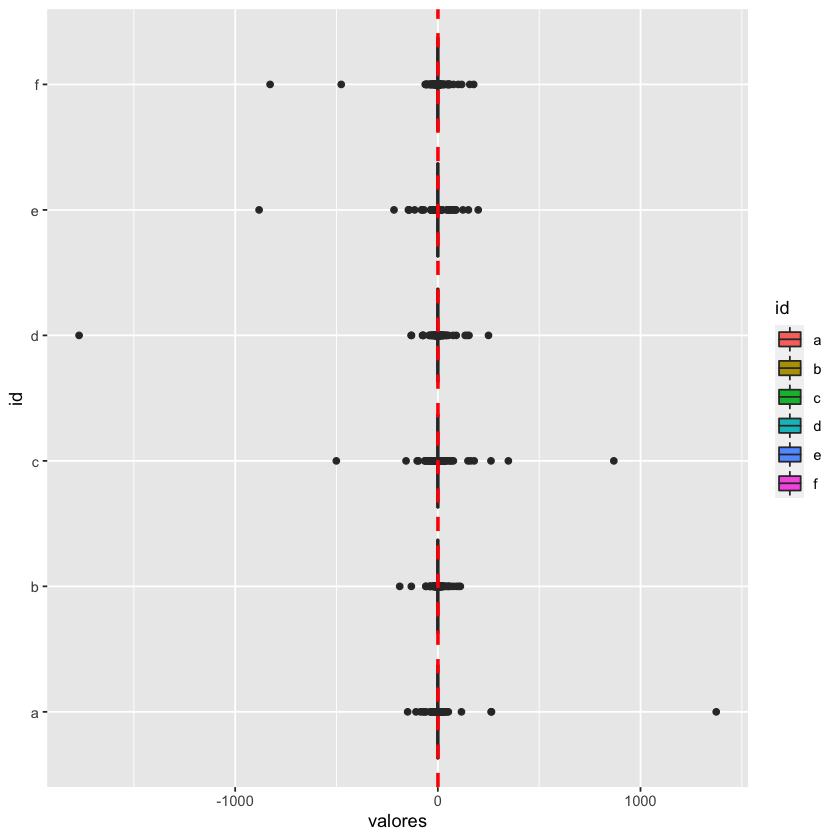

In [34]:
dat_h = data.frame(valores=c(a_datos_h, b_datos_h, c_datos_h, d_datos_h, e_datos_h, f_datos_h), id=rep(c('a','b','c','d','e','f'),each=1000))

ggplot(dat_h, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip() + geom_hline(yintercept = 0.5, linetype="dashed", color = "red", size=1)

Con la Dist Cauchy no deberiamos ver una convergencia clara
Porque la E y la V no son finitas.
Si analizamos la convergencia podemos ver que no converge a una normal sino a otra Cauchy.


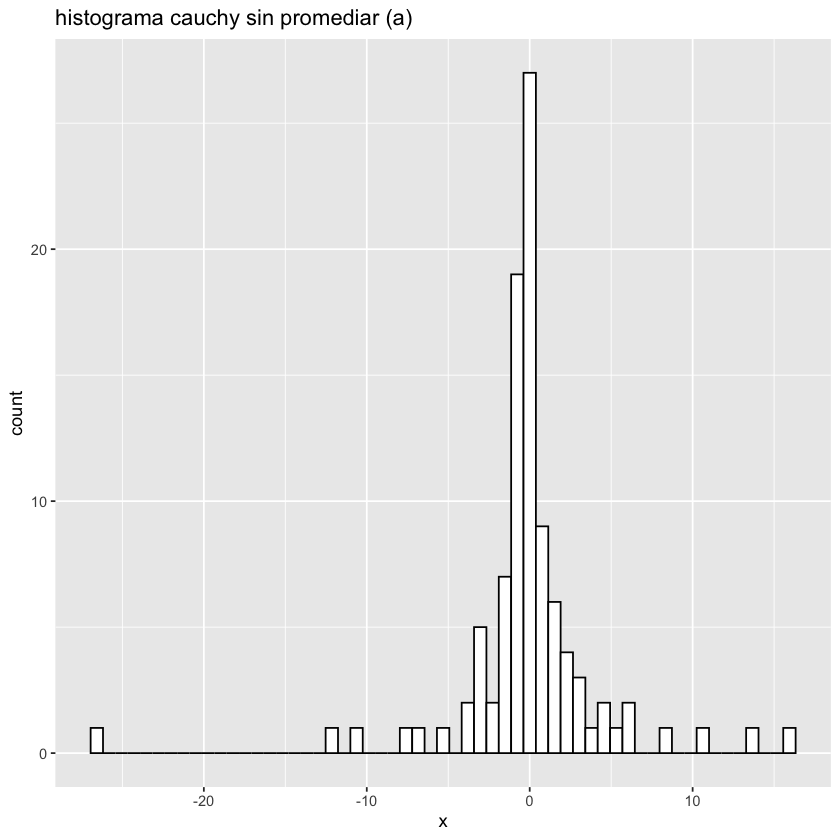

In [44]:
#a = 1000 datos sin promediar
a_datos_h = rcauchy(100, location = 0, scale = 1)
make_histogram(a_datos_h, "histograma cauchy sin promediar (a)")
